# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# see the pre-defined styles provided.
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [6]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [7]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


In [8]:
a=np.random.randn(5)
print(a)
a.cumsum()

[-1.72589     0.61123783  1.30935097  0.69587966  0.32030821]


array([-1.72589   , -1.11465218,  0.1946988 ,  0.89057846,  1.21088667])

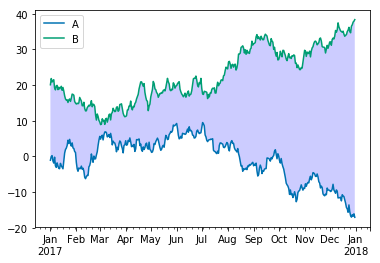

In [16]:
df.plot(None,['A','B'],kind='line'); # add a semi-colon to the end of the plotting call to suppress unwanted output
plt.gca().fill_between(df.index,df['A'],df['B'],facecolor = "blue",alpha = 0.2)

We can select which plot we want to use by passing it into the 'kind' parameter.

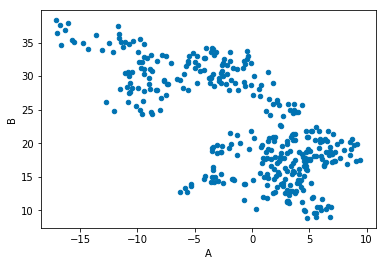

In [19]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

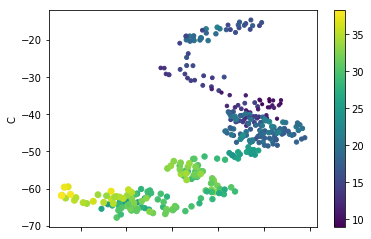

In [22]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c=df['B'], s=df['B'], colormap='viridis')

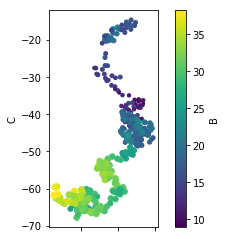

In [23]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

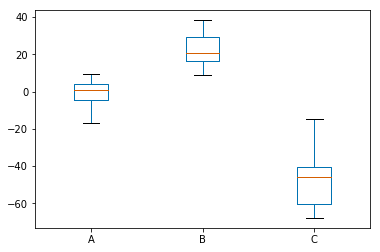

In [24]:
df.plot.box();

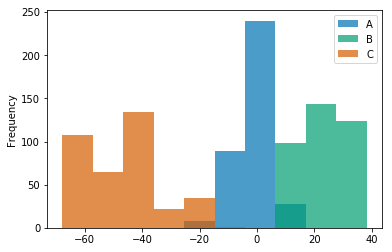

In [25]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

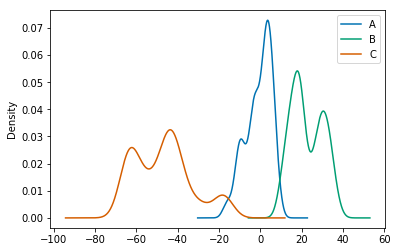

In [26]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [27]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
pd.tools.plotting.scatter_matrix(iris);

C:\Users\dwang\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


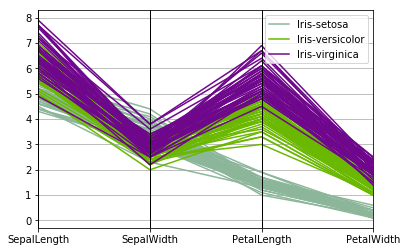

In [28]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [30]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


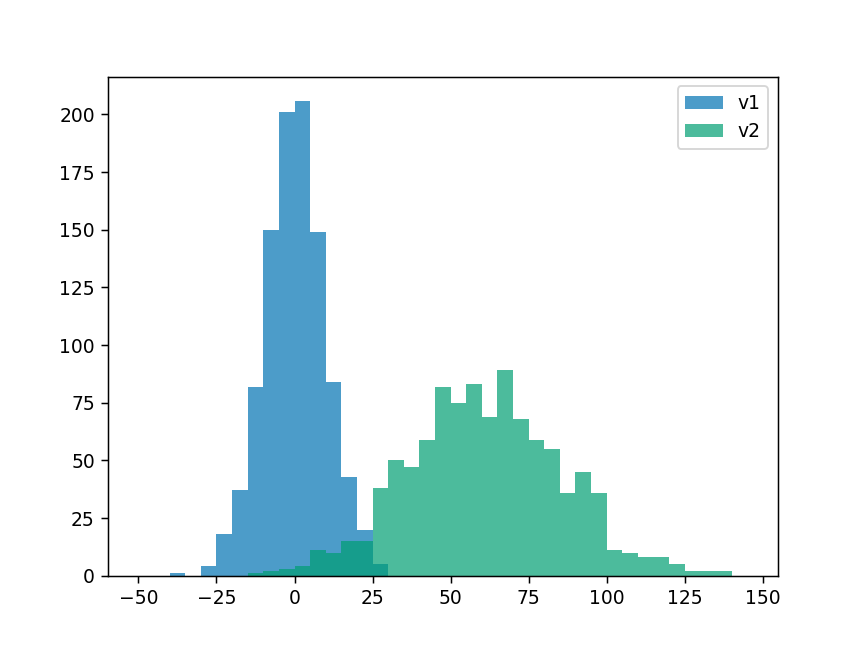

In [31]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


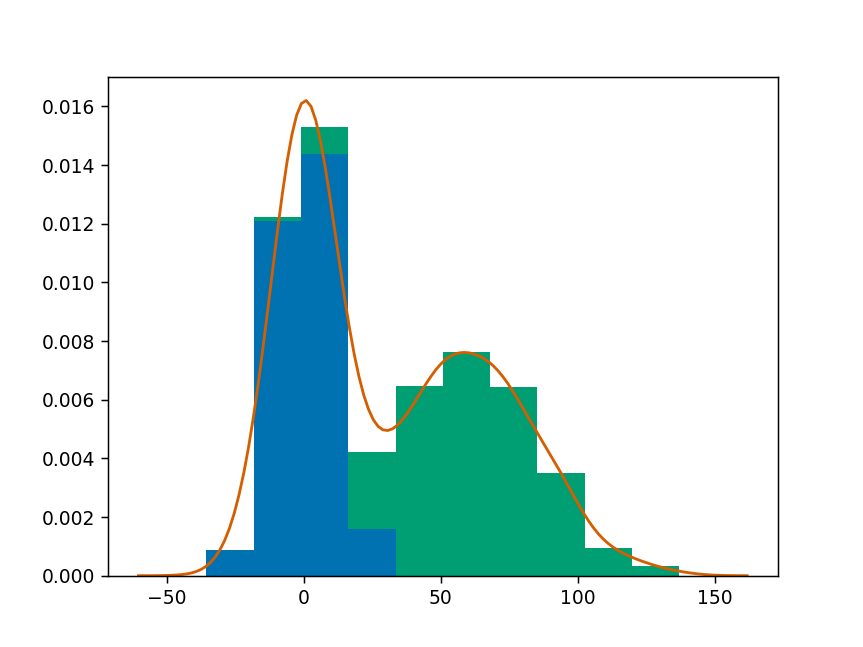

In [33]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

In [ ]:
sns.

<IPython.core.display.Javascript object>


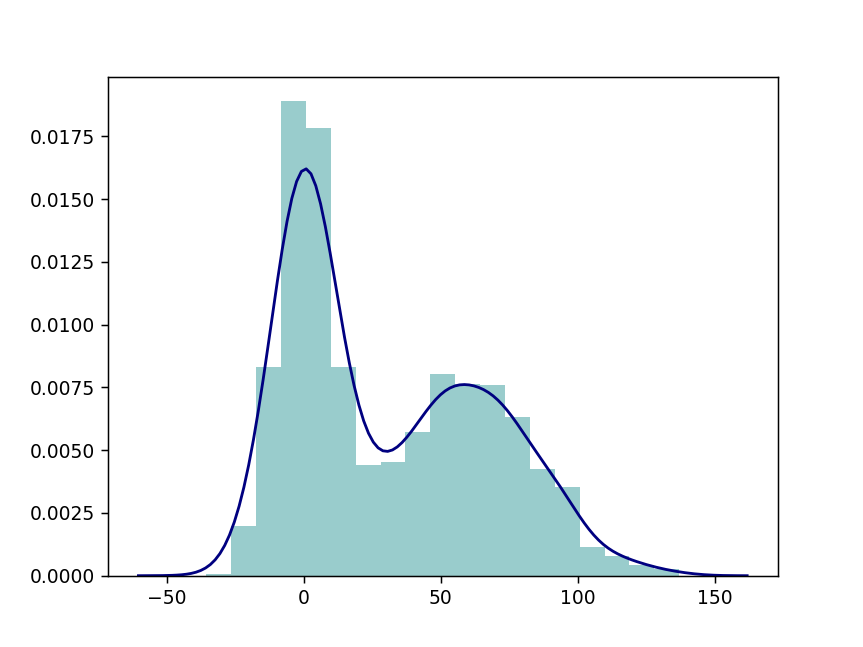

In [34]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


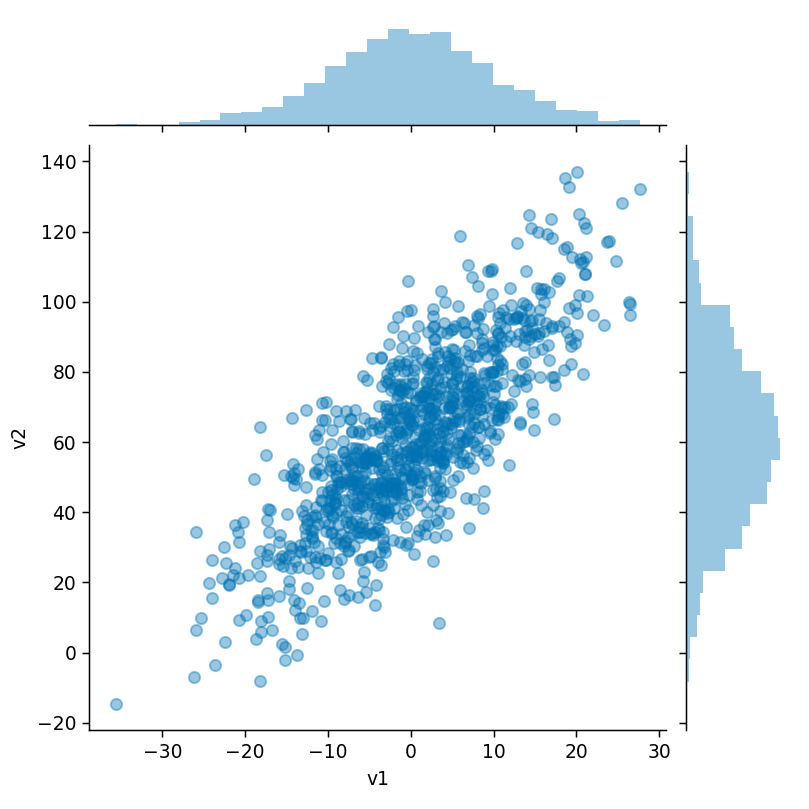

In [35]:
sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


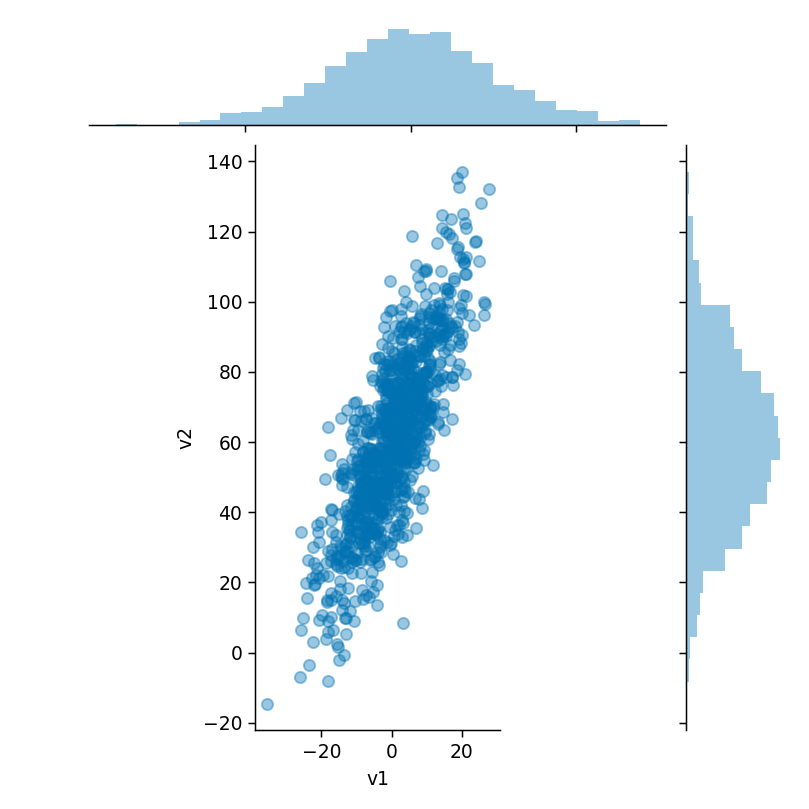

In [36]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


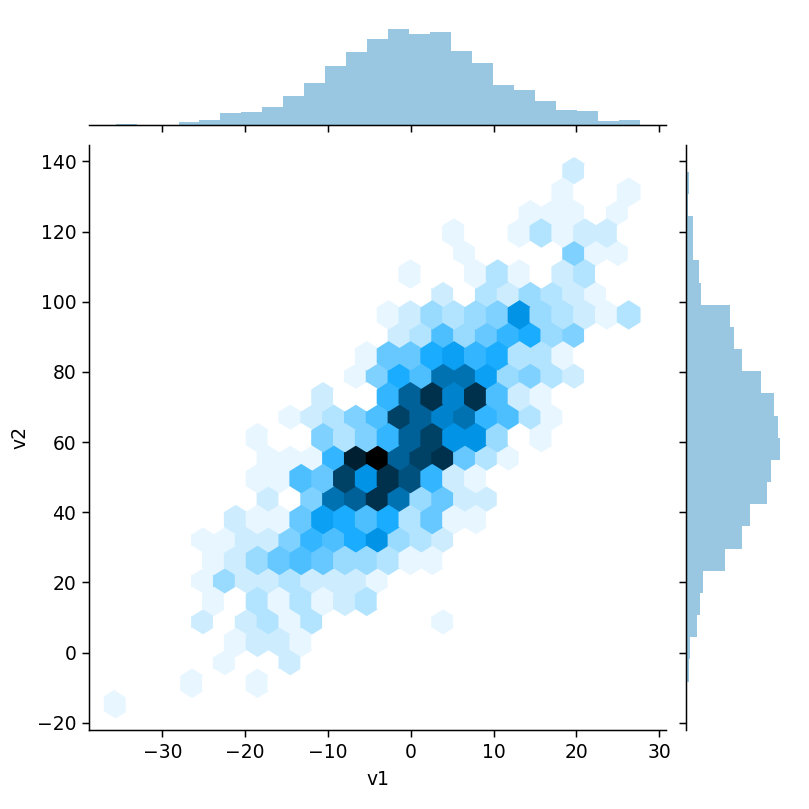

In [37]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


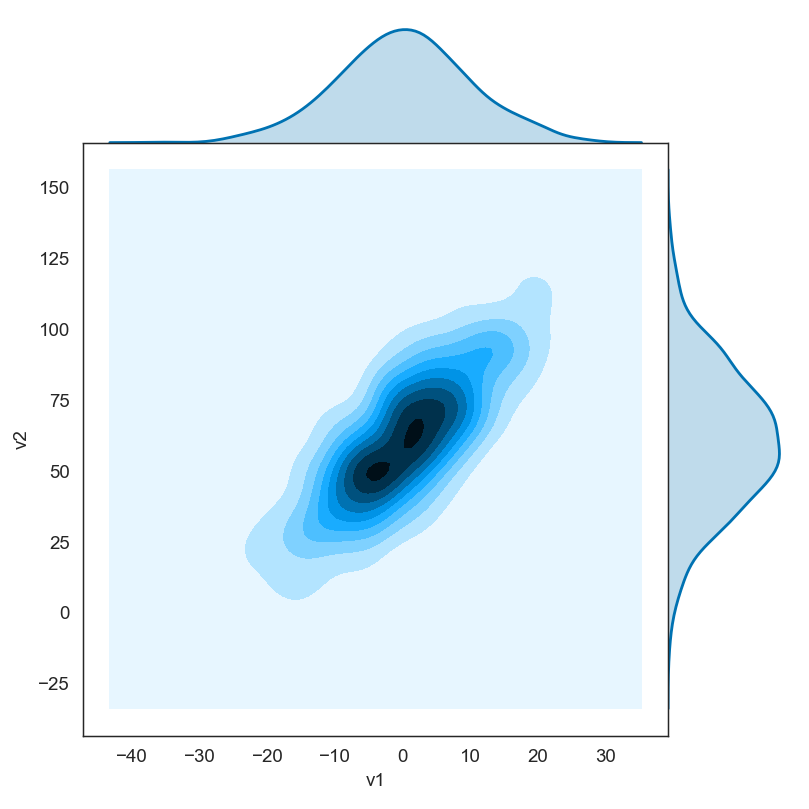

In [38]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [39]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


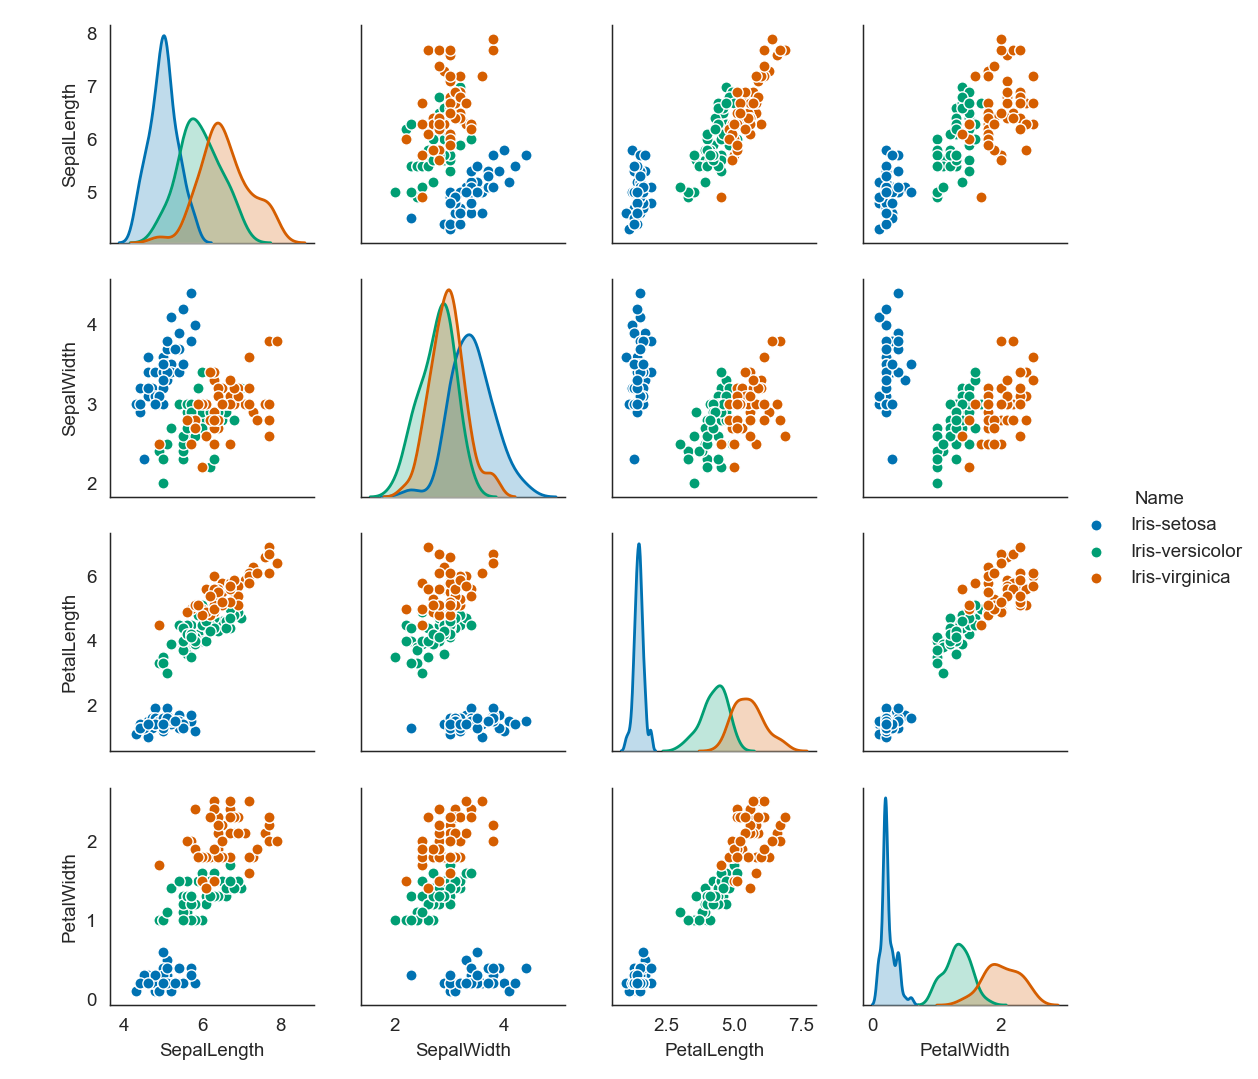

In [46]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);

<IPython.core.display.Javascript object>


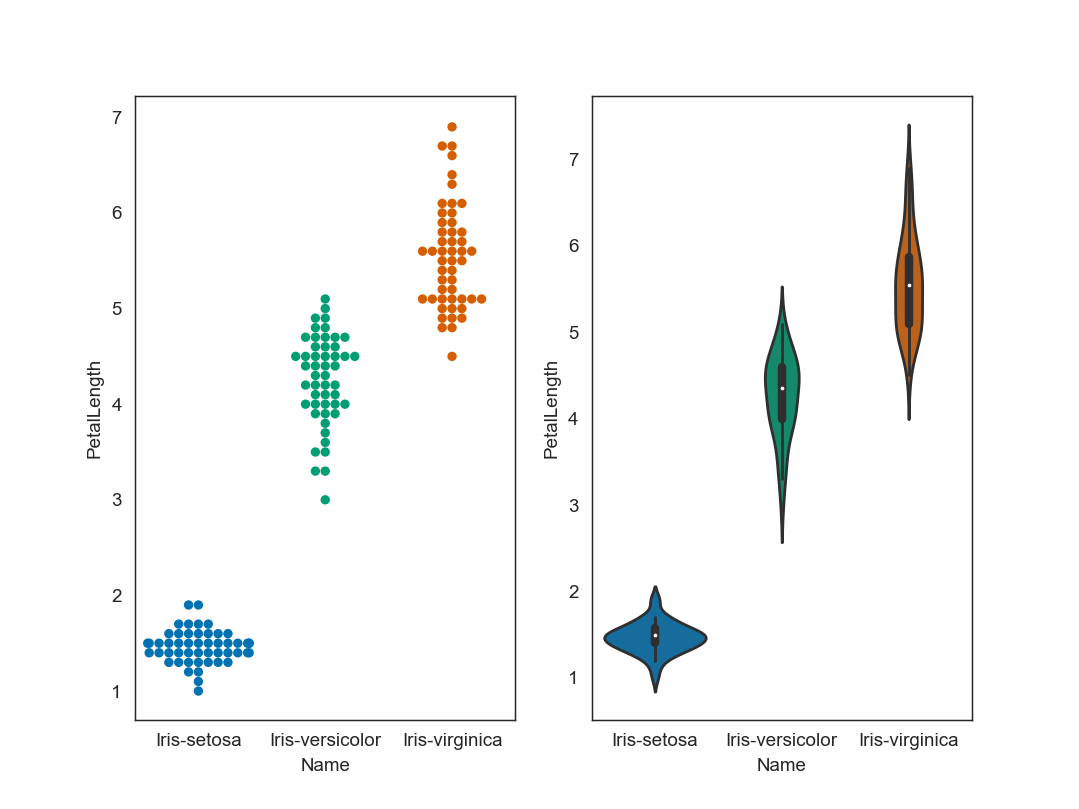

In [52]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);

In [25]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


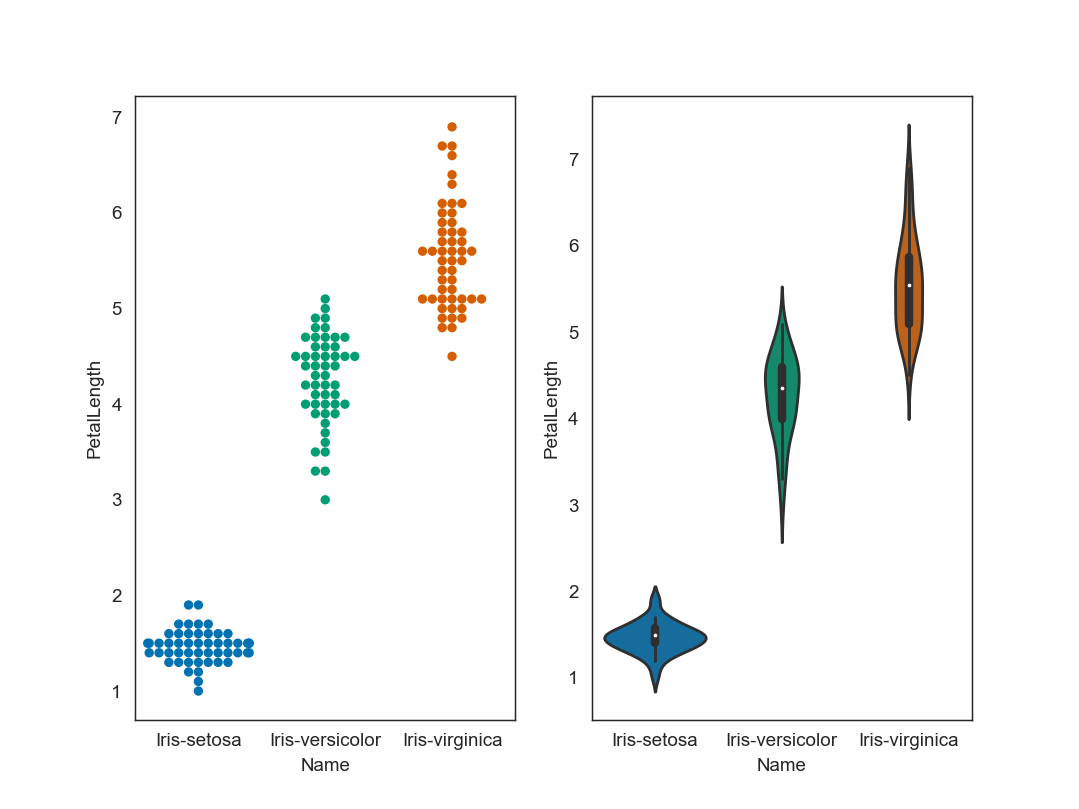

In [51]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot(iris['Name'], iris['PetalLength'])
plt.subplot(122)
sns.violinplot(iris['Name'], iris['PetalLength'])